In [21]:
import math
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt

class SquaresDataset(torch.utils.data.IterableDataset):
    def __init__(self):
        self.size = (32,32)
        self.min_lines = 1
        self.max_lines = 4
        
    def __iter__(self):
        return self
        
    def __next__(self):
        h,w = self.size 
        target = torch.zeros(h,w, dtype=torch.long)
        challenge = torch.zeros(h,w, dtype=torch.long)
        num_lines = torch.randint(self.min_lines,self.max_lines+1,()).item()
        
        line_xx = torch.randperm(w)[:num_lines*2].view(-1,2)
        line_yy = torch.randperm(h)[:num_lines*2].view(-1,2)
        colors = torch.randperm(10).add(1)[:num_lines]
        
        for (x0,x1),(y0,y1),color in zip(line_xx, line_yy, colors):
            challenge[y0,x0] = color
            challenge[y1,x1] = color
            x0,x1 = sorted([x0,x1])
            y0,y1 = sorted([y0,y1])
            target[y0:y1+1,x0] = color
            target[y0:y1+1,x1] = color
            target[y0,x0:x1+1] = color
            target[y1,x0:x1+1] = color
            
        return challenge[None], target[None]
        

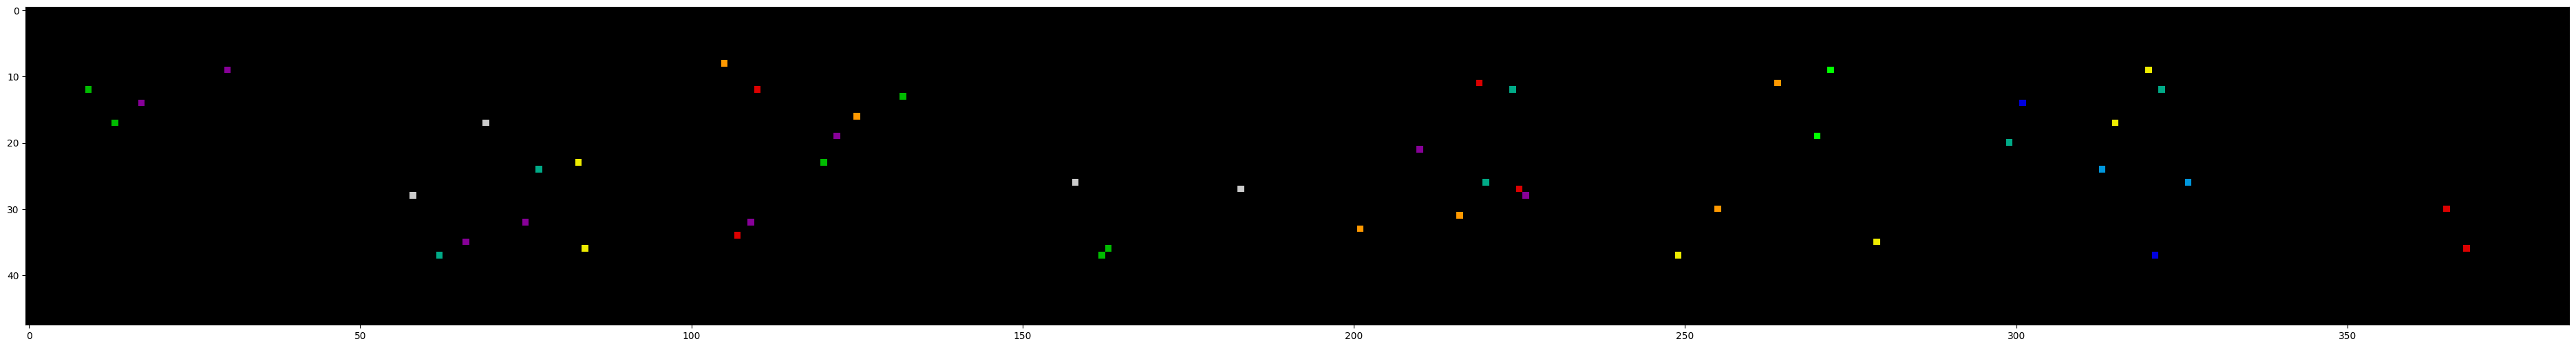

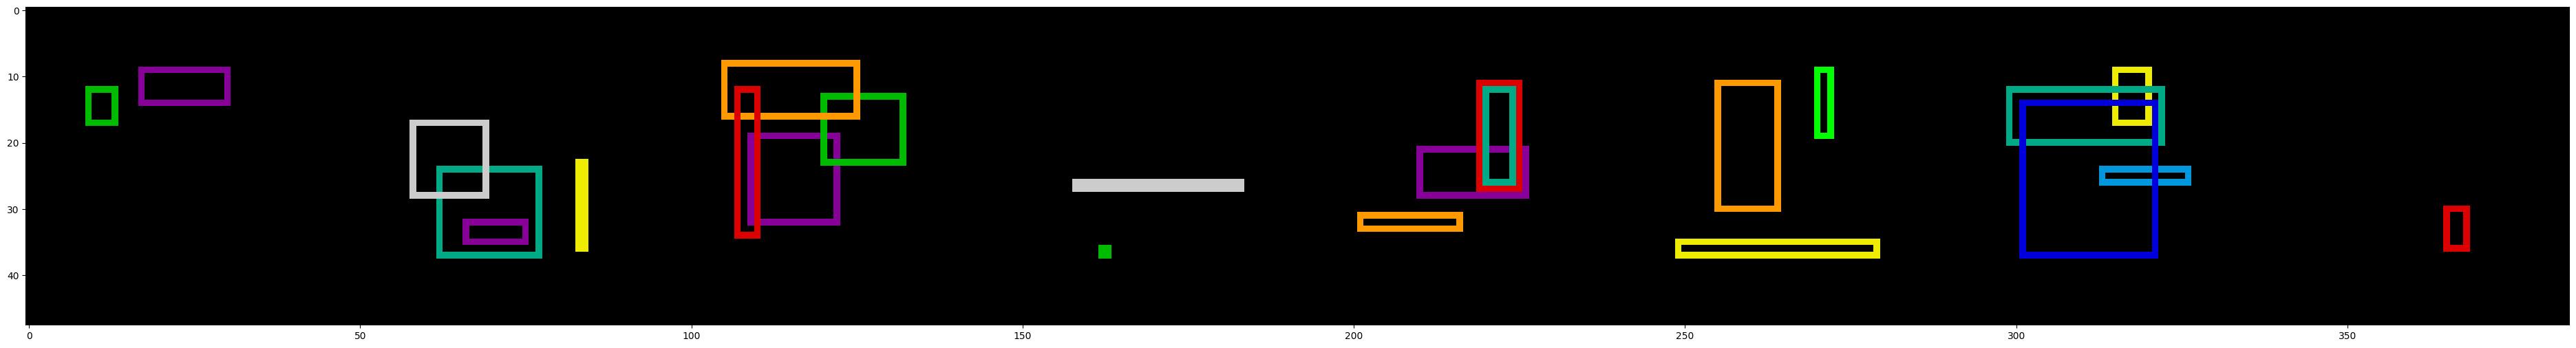

In [28]:
dataset = SquaresDataset()
loader = torch.utils.data.DataLoader(dataset, batch_size=8)
batch, target = next(iter(loader))

batch = torch.cat([F.pad(b, (8,8,8,8)) for b in batch.unbind()], -1)
plt.figure(figsize=(48,6))
plt.imshow(batch.permute(1,2,0).mul(24).numpy(), cmap="nipy_spectral")
plt.show()

target = torch.cat([F.pad(t, (8,8,8,8)) for t in target.unbind()], -1)
plt.figure(figsize=(48,6))
plt.imshow(target.permute(1,2,0).mul(24).numpy(), cmap="nipy_spectral")
plt.show()
